In [55]:
#importing useful directory
import os
import numpy as np
from skimage.io import imsave, imread,imshow
from glob import glob
import numpy as np
import getopt
import argparse
import json
import cv2
import matplotlib.pyplot as plt

In [3]:
# getting images and mask path
path_image="/home/anant/data_science_practicum/p3/dataset/neurofinder.00.00.test//images"
#path_mask="/home/anant/data_science_practicum/p3/dataset/neurofinder.00.00.test/images"

In [4]:
images = sorted(glob(path_image+'/*.tiff'))
#masks = sorted(glob(path_mask+'/*.tiff'))

In [5]:
# Converting images and mask to numpy array
imgs=[]
i=0
for image in (images):
    image_mat = imread(image)
    imgs.append(image_mat)

images_np = np.array(imgs)

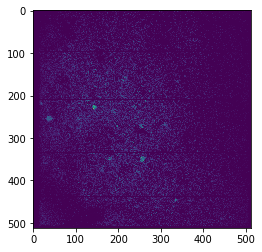

In [79]:
#original image
plt.imshow(images_np[0])

In [58]:
#double thresholdin
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [59]:
res,weak,strong=threshold(img=images_np[0])

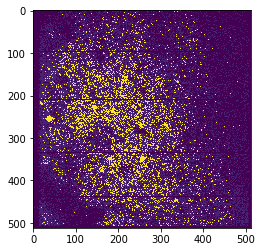

In [80]:
#after applying double thresholding
plt.imshow(res)

In [ ]:
# save intermediate result to numpy array
np.save(save_result_path+'/trainingImages.npy', images_np)
np.save(save_result_path+'/trainingMask.npy',masks_np)